<a href="https://colab.research.google.com/github/sashutosh/DeepLearning/blob/master/ModelComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RAS Busyness Prediction model
This is a model comparison exercise to compare across various models and determine which model fits best and also which parameter most affect the busyness of the worker


In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split    

Since colab cannot acess internal github hence url is of my github repo. To access an internal copy it is stored at https://github.houston.softwaregrp.net/oo-rnd/busyness-data/blob/master/Results_clean_v2.csv


In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/sashutosh/DeepLearning/master/Data/Results_clean_v2.csv")
raw_data.describe()

,averageExecutionTime,medianOfFlowDuration,maxFlowDuration,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1.001000e+03,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,18733.003197,19039.875125,21333.276723,0.281965,0.300243,0.401002,1.829535e+09,1.829295e+09,1.830428e+09,47.607412,47.606394,47.615385,0.362306,0.362322,0.466484,29.764607,29.756244,30.847153,0.969633,0.734266,1.919081,1.863504,1.588500,3.883035,0.285370,0.303779,0.405332
std,18674.395889,19725.571735,21123.516049,0.191692,0.207350,0.258964,1.463316e+09,1.463231e+09,1.463975e+09,10.888048,10.888017,10.885078,0.177689,0.184013,0.194023,20.652822,20.693055,21.409662,5.315752,4.786159,10.547817,0.953616,1.219071,2.059587,0.194326,0.210422,0.261901
min,9073.000000,8923.000000,10178.000000,0.030818,0.016000,0.057000,1.196239e+08,1.200000e+08,1.196239e+08,18.000000,18.000000,18.000000,0.076415,0.054000,0.107000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11897.600000,12114.000000,13252.000000,0.084526,0.093000,0.140000,3.269283e+08,3.270000e+08,3.269346e+08,51.000000,51.000000,51.000000,0.207735,0.207000,0.310000,12.166667,12.000000,13.000000,0.000000,0.000000,0.000000,1.130000,0.560000,2.173000,0.086418,0.095000,0.142000
50%,13210.200000,13401.000000,14704.000000,0.279197,0.296000,0.384000,1.707482e+09,1.710000e+09,1.707485e+09,52.000000,52.000000,52.000000,0.320339,0.313000,0.409000,28.000000,28.000000,28.000000,0.000000,0.000000,0.000000,1.713333,1.427000,4.027000,0.281380,0.300000,0.389000
75%,15934.800000,15906.000000,17641.000000,0.419132,0.457000,0.587000,2.583467e+09,2.580000e+09,2.583467e+09,53.000000,53.000000,53.000000,0.509635,0.510000,0.618000,44.833333,45.000000,47.000000,0.000000,0.000000,0.000000,2.506667,2.240000,4.640000,0.423855,0.465000,0.598000
max,233506.200000,233401.000000,235501.000000,0.809707,0.906000,1.000000,6.311979e+09,6.310000e+09,6.318758e+09,54.000000,54.000000,54.000000,0.881175,0.881000,0.934000,91.333333,91.000000,92.000000,93.000000,93.000000,146.000000,5.000000,6.253000,12.453000,0.816411,0.909000,1.000000


The raw data contain columns which have all the discreet values (per metric) captured during the experiment. Those values were needed only for manual verification, hence filtering them out.


In [3]:
ras_metrics=raw_data[['averageExecutionTime','avgCpuByProcess','medianOfCpuByProcess','maxCpuByProcess','avgDiskByProcess','medianOfDiskByProcess','maxDiskByProcess','avgMemByProcess','medianOfMemByProcess','maxMemByProcess','percentageHeap','medianOfHeap','maxHeap','percentageWorkerThreads','medianOfWorkerThreads','maxWorkerThreads','avgInBufferSize','medianOfInBuffer','maxInBuffer','percentageOutBuffer','medianOfOutBuffer','maxOutBuffer','avgSystemCpuJmx','medianOfSystemCpu','maxSystemCpu']]

### Output variable
The average execution time is considered as the output variable that directly determines the busyness value of RAS worker node, the higher the execution time more busy\used the worker node is.

####Capping outliers
Since there are many outliers in the average execution time capping it to certain maxvalue


In [4]:
#Capping at max value
maxVal=50000
ras_metrics['averageExecutionTime'][ras_metrics['averageExecutionTime'] >= maxVal] = maxVal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Parameter Normalization
Except disk usage all other patameters are normalized between 0-1. Using a minmax scaler to normalize disk


In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
ras_metrics[['avgDiskByProcess']] = min_max_scaler.fit_transform(ras_metrics[['avgDiskByProcess']])
ras_metrics[['percentageWorkerThreads']] = min_max_scaler.fit_transform(ras_metrics[['percentageWorkerThreads']])
fig = px.histogram(ras_metrics, x='avgDiskByProcess',title='Distribution of disk usage',height=400)
fig.show()

fig1 = px.histogram(ras_metrics, x='percentageWorkerThreads',title='Percentage fo worker threads',height=400)
fig1.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

###Initial data analysis
Checking correlation between the output and input variables 

In [ ]:
corr = ras_metrics.corr()
corr

,averageExecutionTime,avgCpuByProcess,medianOfCpuByProcess,maxCpuByProcess,avgDiskByProcess,medianOfDiskByProcess,maxDiskByProcess,avgMemByProcess,medianOfMemByProcess,maxMemByProcess,percentageHeap,medianOfHeap,maxHeap,percentageWorkerThreads,medianOfWorkerThreads,maxWorkerThreads,avgInBufferSize,medianOfInBuffer,maxInBuffer,percentageOutBuffer,medianOfOutBuffer,maxOutBuffer,avgSystemCpuJmx,medianOfSystemCpu,maxSystemCpu
averageExecutionTime,1.000000,0.280996,0.261092,0.287648,0.198137,0.198296,0.198136,0.194608,0.194459,0.194683,0.392303,0.378232,0.382723,0.363906,0.360850,0.340872,0.259144,0.224459,0.253975,-0.011664,-0.037234,-0.008066,0.279643,0.259809,0.286002
avgCpuByProcess,0.280996,1.000000,0.990295,0.982352,0.352586,0.352789,0.352981,0.307152,0.307037,0.307333,0.304237,0.298966,0.430460,0.229928,0.224596,0.192679,0.110596,0.102793,0.107572,0.340130,0.171820,0.449334,0.997970,0.988611,0.980527
medianOfCpuByProcess,0.261092,0.990295,1.000000,0.960539,0.346600,0.346805,0.347003,0.314259,0.314168,0.314398,0.296399,0.290886,0.421043,0.202776,0.197404,0.165443,0.112358,0.099449,0.111570,0.328117,0.165945,0.431969,0.988494,0.998051,0.959106
maxCpuByProcess,0.287648,0.982352,0.960539,1.000000,0.354238,0.354423,0.354647,0.292993,0.292843,0.293270,0.295579,0.292176,0.421924,0.222130,0.216752,0.186833,0.119677,0.114637,0.118968,0.318787,0.154946,0.433875,0.981390,0.960049,0.998535
avgDiskByProcess,0.198137,0.352586,0.346600,0.354238,1.000000,0.999999,0.999999,0.414446,0.414420,0.414515,0.163432,0.153003,0.148056,0.203379,0.200188,0.172480,0.196110,0.202799,0.167736,0.034505,0.043099,-0.048147,0.355877,0.349107,0.355482
medianOfDiskByProcess,0.198296,0.352789,0.346805,0.354423,0.999999,1.000000,0.999998,0.414388,0.414362,0.414457,0.163642,0.153216,0.148262,0.203691,0.200500,0.172787,0.196187,0.202869,0.167823,0.034566,0.043110,-0.048135,0.356079,0.349311,0.355662
maxDiskByProcess,0.198136,0.352981,0.347003,0.354647,0.999999,0.999998,1.000000,0.414295,0.414269,0.414364,0.163198,0.152771,0.147866,0.203564,0.200372,0.172651,0.196216,0.202911,0.167823,0.034566,0.043110,-0.048048,0.356274,0.349513,0.355892
avgMemByProcess,0.194608,0.307152,0.314259,0.292993,0.414446,0.414388,0.414295,1.000000,0.999995,0.999982,0.397673,0.384650,0.404668,-0.106674,-0.111830,-0.117945,0.078945,0.067595,0.077842,0.054452,0.037025,0.048636,0.309798,0.315573,0.294544
medianOfMemByProcess,0.194459,0.307037,0.314168,0.292843,0.414420,0.414362,0.414269,0.999995,1.000000,0.999967,0.397742,0.384728,0.404681,-0.106717,-0.111871,-0.117991,0.078906,0.067577,0.077780,0.054318,0.036992,0.048518,0.309684,0.315485,0.294396
maxMemByProcess,0.194683,0.307333,0.314398,0.293270,0.414515,0.414457,0.414364,0.999982,0.999967,1.000000,0.398054,0.385010,0.405087,-0.106671,-0.111822,-0.117903,0.078934,0.067569,0.077864,0.054734,0.037183,0.048759,0.309982,0.315711,0.294827


### Random Forest Classifier


> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxDiskByProcess
3.   maxHeap
4.   percentageWorkerThreads


> Model accuracy score =
 0.6915422885572139





















/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model Accuracy
0.6915422885572139


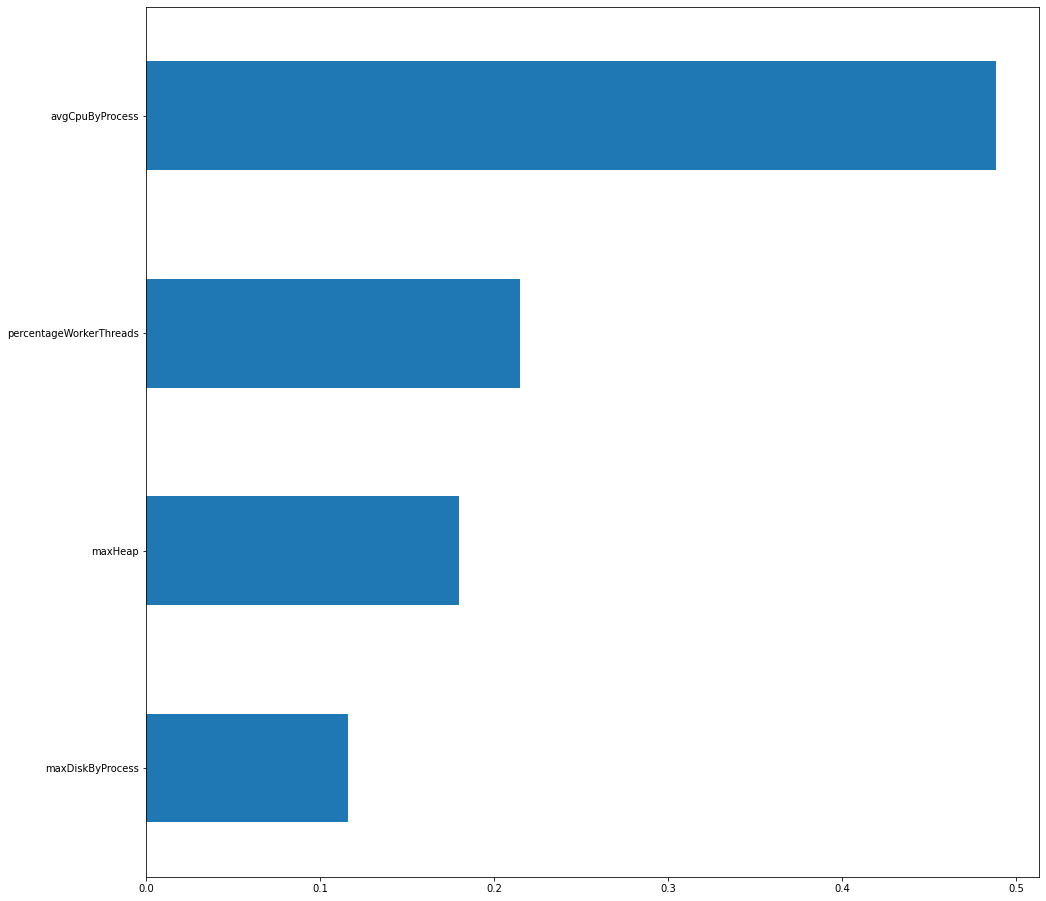

In [ ]:
#Random forest classifier
#3 classes
#4 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)


y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_test))


### Random Forest Classifier


> Classes 4






> Features
1.   avgCpuByProcess 
2.   maxDiskByProcess
3.   maxHeap
4.   percentageWorkerThreads


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model Accuracy
0.6218905472636815


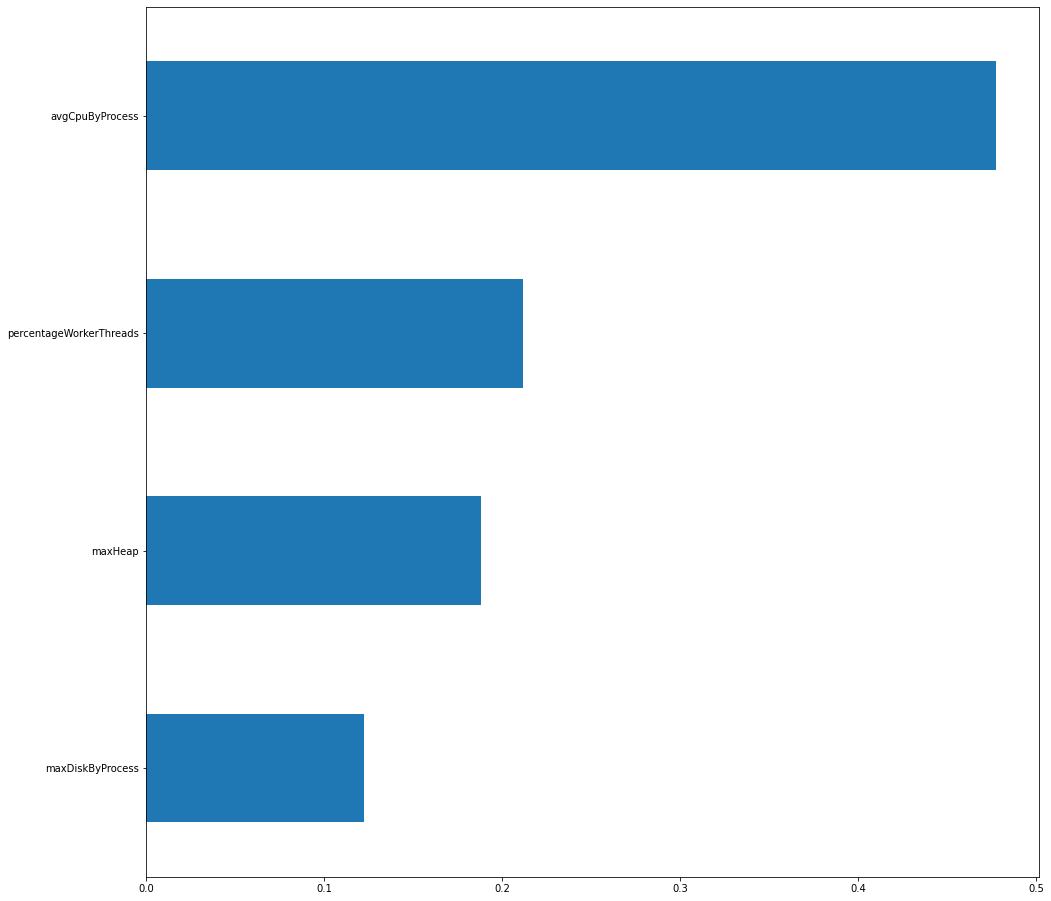

In [ ]:
#Random forest classifier
#4 classes
#4 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)


y=ras_metrics_training_LogReg['quintile']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_test))


### Random Forest Classifier


> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads

> Model accuracy score = 0.6865671641791045



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model Accuracy
0.6865671641791045


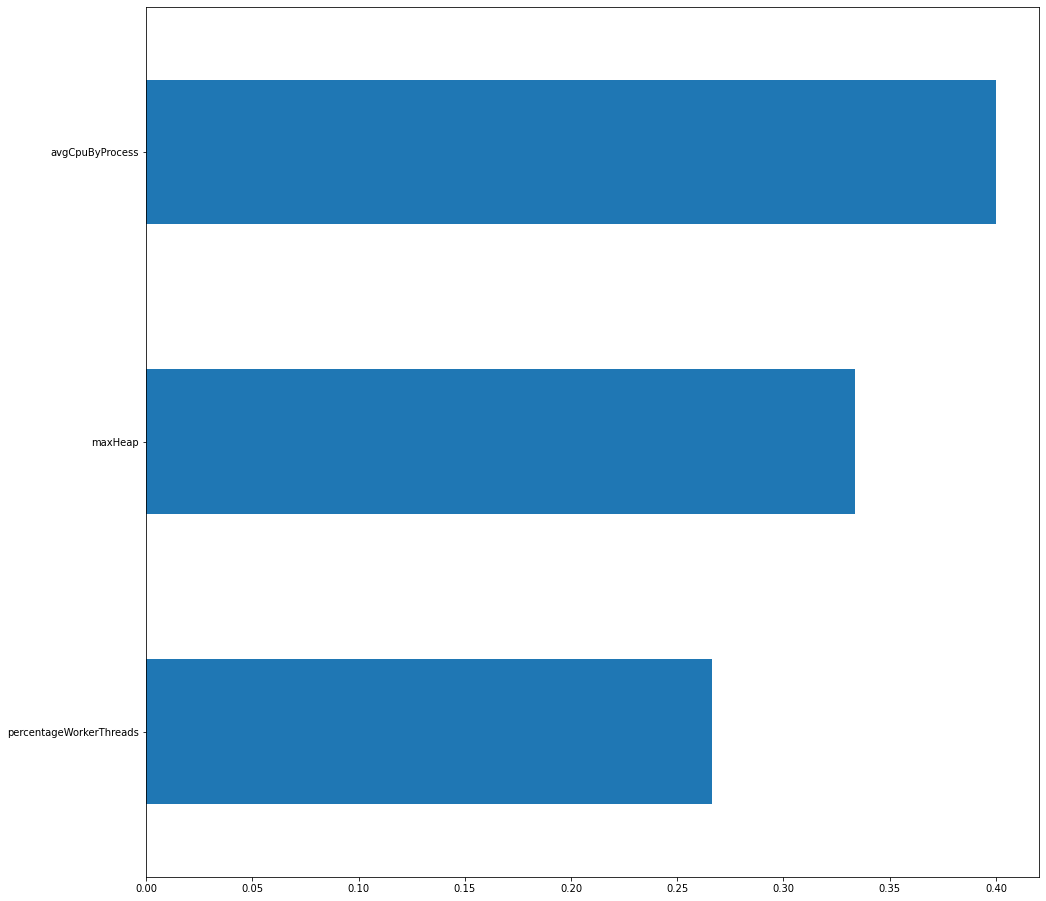

In [ ]:
#Random forest classifier
#3 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)


y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_test))


### Random Forest Classifier


> Classes 4






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads

> Model accuracy score = 0.487

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model Accuracy
0.48756218905472637


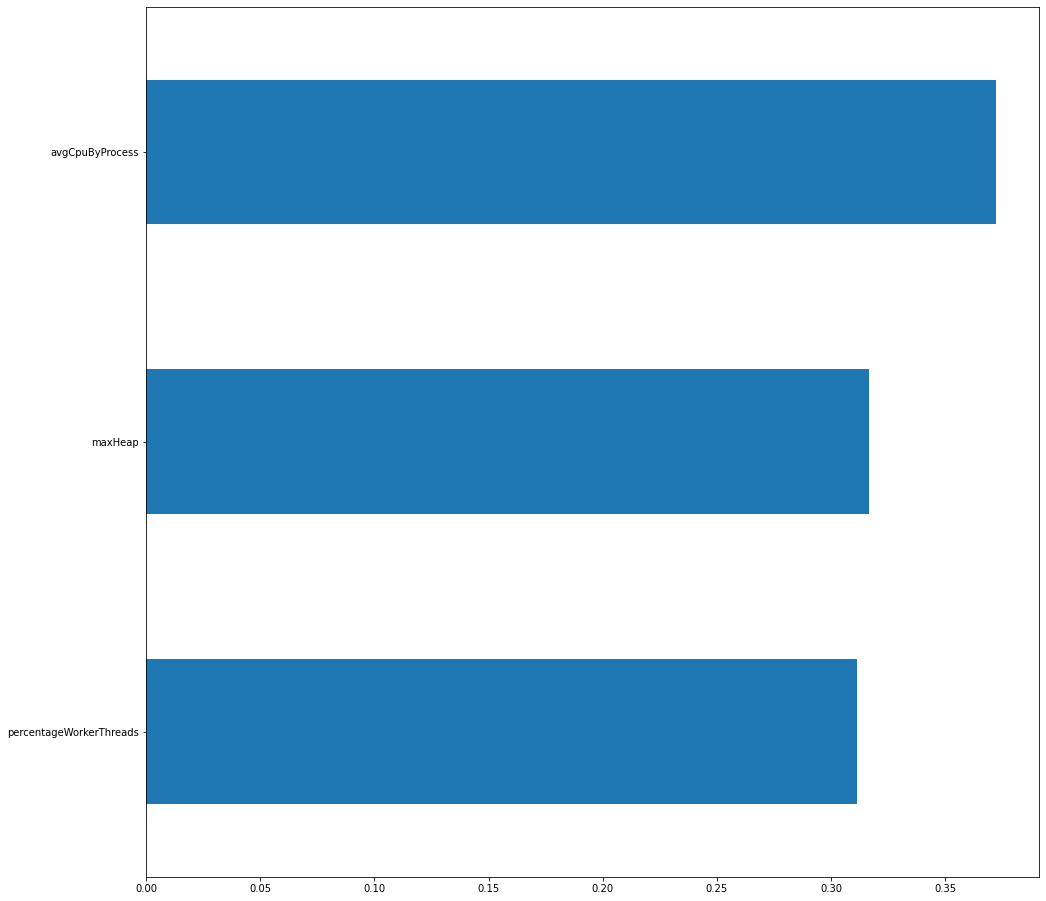

In [ ]:
#Random forest classifier
#4 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)


y=ras_metrics_training_LogReg['quintile']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_test))

### Random Forest Classifier


> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads
4.   maxDiskByProcess
5.   Sum of inbuffer + outbuffer


> Model accuracy score = 0.681592039800995

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Model Accuracy
0.681592039800995


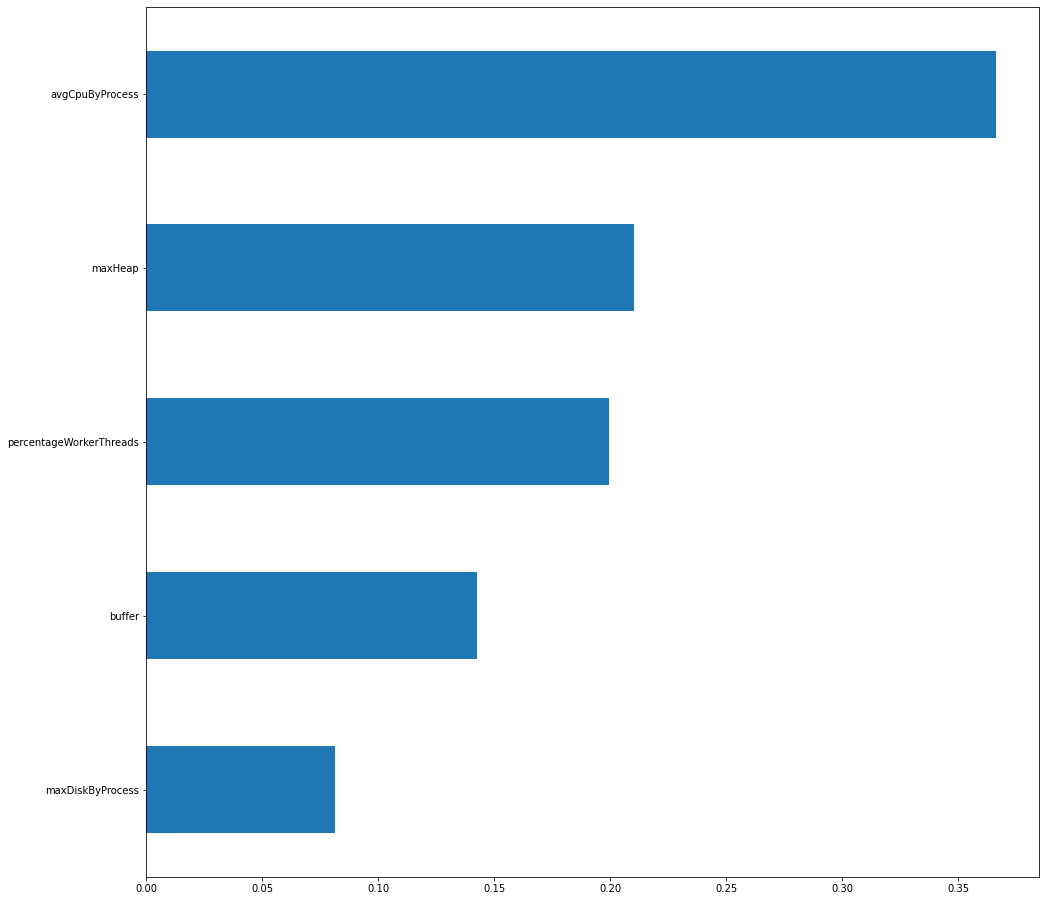

In [ ]:
#Random forest classifier
#3 classes
#5 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads']]
ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0,min_samples_split=3)

#class_weight='balanced_subsample'
model_rf.fit(X_train,Y_train)#Fitting the model 

pred_rf=model_rf.predict(X_test)
pred_rf_proba=model_rf.predict_proba(X_test)

feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values()
feat_importances.plot(kind='barh',figsize=(16,16))#Plotting feature importance

print('Model Accuracy')
print(model_rf.score(X_test,Y_test))


## Random Forest Classifier summary
Comparing all the models below is the conclusion


1.   3 classes gave better results compared to 4 classes (69% vs 62%)
2.   The best model is 3 class with 5 features having score of 0.69




###Grid Search
Performing grid search on hyper parameters to find the best Random Forest 
estimator

Improve the score to 0.7114427860696517



In [20]:
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads']]
ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [3,5,7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 7,10],
    'n_estimators': [10, 30, 50]
}
# Create a based model
rf = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,Y_train)
print('Grid search score',grid_search.score(X_test,Y_test))
Y_test_pred = grid_search.predict(X_test)
print('The shapes are ', X_test.shape ,Y_test.shape, Y_test_pred.shape)
from google.colab import files
output = np.column_stack((X_test,Y_test,Y_test_pred))
output_data = pd.DataFrame(output)#pd.merge(pd.DataFrame(X_test), pd.DataFrame(Y_test).merge(pd.DataFrame(Y_test_pred)))
#output_data.head
output_data.to_csv(r'output_random_forest_gs.csv',index=False, header=True)
#files.download('output_random_forest_gs.csv')
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(Y_test, Y_test_pred)
print('Confusion matrix', conf_mx)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Grid search score 0.7114427860696517
The shapes are  (201, 5) (201,) (201,)
Confusion matrix [[50 11  0]
 [18 44  7]
 [ 4 18 49]]


[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   58.2s finished


### Stochastic Gradient Descent Classifier
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads
4.   Sum of inbuffer + outbuffer

> Accuracy score =  0.5373134328358209

In [28]:
#SGD classifier
#3 classes
#4 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42,max_iter=1000)
sgd_clf.fit(X_train,Y_train)
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = sgd_clf.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))
print('Score', sgd_clf.score(X_test,Y_test))
print ('Params', sgd_clf.get_params())
print ('Decision function', sgd_clf.decision_function(X_train))
#Y_pred

Correct prediction # 0.57125
Score 0.5621890547263682
Params {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Decision function [[ 1.99926696 -1.96318863 -2.93930125]
 [-0.35607239 -2.32458187 -0.71935236]
 [-1.04093142 -2.8718319   0.4282111 ]
 ...
 [ 0.78549623 -2.51443168 -1.2760328 ]
 [ 2.36380952 -2.15048766 -2.94955963]
 [-0.83785268 -2.23266272 -0.4338247 ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Stochastic Gradient Descent Classifier
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads
4.   Sum of inbuffer + outbuffer
5.   diskbyProcess

> Accuracy score =  0.33

In [ ]:
#SGD classifier
#3 classes
#5 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads','maxDiskByProcess']]
ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42,max_iter=1000)
sgd_clf.fit(X_train,Y_train)
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = sgd_clf.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))
print('Score', sgd_clf.score(X_test,Y_test))
print ('Params', sgd_clf.get_params())
print ('Decision function', sgd_clf.decision_function(X_train))
Y_pred

Correct prediction # 0.32875
Score 0.35323383084577115
Params {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Decision function [[-7.45772720e+14 -5.43424273e+16  3.62875298e+16]
 [-1.02895997e+16 -7.49775111e+17  5.00667490e+17]
 [-1.93720884e+15 -1.41159133e+17  9.42599826e+16]
 ...
 [-1.02602003e+16 -7.47632854e+17  4.99236984e+17]
 [-7.45316842e+14 -5.43092087e+16  3.62653479e+16]
 [-1.93304374e+15 -1.40855634e+17  9.40573188e+16]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Stochastic Gradient Descent Classifier
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads


> Accuracy score =  0.56


In [29]:
#SGD classifier
#3 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42,max_iter=1000)
sgd_clf.fit(X_train,Y_train)
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = sgd_clf.predict(X_train)
Y_test_pred = sgd_clf.predict(X_test)
n_correct = sum(Y_pred == Y_train)
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(Y_test, Y_test_pred)
print(conf_mx)

print('Correct prediction #', n_correct/len(Y_train))
print('Score', sgd_clf.score(X_test,Y_test))
print ('Params', sgd_clf.get_params())
print ('Decision function', sgd_clf.decision_function(X_train))

[[57  0  4]
 [47  3 19]
 [18  0 53]]
Correct prediction # 0.55875
Score 0.5621890547263682
Params {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Decision function [[ 2.29670366 -1.33161049 -2.58145535]
 [ 0.16217345 -1.72322509 -0.70681778]
 [-0.43577488 -2.18846358  0.27079609]
 ...
 [ 0.61502383 -1.81058034 -0.88762373]
 [ 2.31219354 -1.4572549  -2.43154194]
 [-0.39610338 -1.66911355 -0.41573006]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Logistic Classifier
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads
4.   Sum of inbuffer + outbuffer

> Accuracy score =  0.5223880597014925


In [ ]:
#Logistic classifier
#3 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial')
lr.fit(X_train, Y_train)

cross_val_score(lr, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = lr.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))
print('Score', lr.score(X_test,Y_test))
print ('Params', lr.get_params())
#print ('Decision function', sgd_clf.decision_function(X_train))

Correct prediction # 0.5625
Score 0.5223880597014925
Params {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means t

### Logistic Regression CV
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads

> Accuracy score =  0.61

In [ ]:
#sklearn.linear_model.LogisticRegressionCV();
#Logistic classifier
#3 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(random_state=0, solver='saga', multi_class='multinomial')
lr.fit(X_train, Y_train)

cross_val_score(lr, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = lr.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))
print('Score', lr.score(X_test,Y_test))
print ('Params', lr.get_params())
#print ('Decision function', sgd_clf.decision_function(X_train))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means t

Correct prediction # 0.61375
Score 0.6119402985074627
Params {'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'refit': True, 'scoring': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



### Logistic Regression CV lgbfs solver
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads

> Accuracy score =  0.50


In [23]:
#sklearn.linear_model.LogisticRegressionCV();
#Logistic classifier
#3 classes
#2 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','percentageWorkerThreads','maxHeap']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(random_state=0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, Y_train)

cross_val_score(lr, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = lr.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))
print('Score', lr.score(X_test,Y_test))
print ('Params', lr.get_params())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Correct prediction # 0.55375
Score 0.5024875621890548
Params {'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}


### OneVsRestClassifier with Non linear (polynomial) classification
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads

> Accuracy score =  0.57

In [ ]:
#sklearn.linear_model.OneVsRestClassifier();
#OneVsRest classifier
#3 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

lr = OneVsRestClassifier(SVC(kernel="poly", degree=3, coef0=1, C=5))
lr.fit(X_train, Y_train)

#cross_val_score(lr, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = lr.predict(X_train)
n_correct = sum(Y_pred == Y_train)
print('Correct prediction #', n_correct/len(Y_train))
print('Score', lr.score(X_test,Y_test))
print ('Params', lr.get_params())
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Y_test_pred = cross_val_predict(poly_kernel_svm_clf, X_test, Y_test, cv=3)
Y_test_pred = poly_kernel_svm_clf.predict(X_test)
conf_mx = confusion_matrix(Y_test, Y_test_pred)
conf_mx
print('The shapes are ', X_test.shape ,Y_test.shape, Y_test_pred.shape)
from google.colab import files
output = np.column_stack((X_test,Y_test,Y_test_pred))
output_data = pd.DataFrame(output)#pd.merge(pd.DataFrame(X_test), pd.DataFrame(Y_test).merge(pd.DataFrame(Y_test_pred)))
#output_data.head
output_data.to_csv(r'output2.csv',index=False, header=True)
files.download('output2.csv')


Correct prediction # 0.60125
Score 0.5771144278606966
Params {'estimator__C': 5, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 1, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'n_jobs': None}
The shapes are  (201, 3) (201,) (201,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Support Vector machine
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads

> Accuracy score =  0.67


In [24]:
#sklearn.linear_model.SVC();

#3 classes
#3 features
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=1))
    ])
poly_kernel_svm_clf.fit(X_train, Y_train)
print('Test Score', poly_kernel_svm_clf.score(X_test,Y_test))
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Y_train_pred = cross_val_predict(poly_kernel_svm_clf, X_test, Y_test, cv=3)
conf_mx = confusion_matrix(Y_test, Y_train_pred)
conf_mx

Test Score 0.5373134328358209


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[20, 34,  7],
       [27, 25, 17],
       [ 7, 26, 38]])

### XGBoost Classifier
> Classes 3






> Features
1.   avgCpuByProcess 
2.   maxHeap
3.   percentageWorkerThreads
4.   maxDiskByProcess

> Accuracy score =  0.711

In [ ]:
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgBoost = XGBClassifier()
xgBoost.fit(X_train, Y_train)

#cross_val_score(lr, X_train, Y_train, cv=3, scoring="accuracy")
Y_pred = xgBoost.predict(X_train)
Y_pred_test = xgBoost.predict(X_test)
n_correct = sum(Y_pred == Y_train)
print('Feature importance', xgBoost.feature_importances_)
print('Score', xgBoost.score(X_test,Y_test))
print('Accuracy score train data#', accuracy_score(Y_pred,Y_train))
print('Accuracy score test data#', accuracy_score(Y_pred_test,Y_test))
#print('Score', lr.score(X_test,Y_test))
#print ('Params', lr.get_params())
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Y_train_pred = cross_val_predict(poly_kernel_svm_clf, X_test, Y_test, cv=3)
conf_mx = confusion_matrix(Y_test, Y_train_pred)
conf_mx

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Feature importance [0.4368499  0.15315212 0.20692913 0.20306878]
Score 0.7114427860696517
Accuracy score train data# 0.82125
Accuracy score test data# 0.7114427860696517


array([[30, 25,  6],
       [17, 28, 24],
       [ 2, 21, 48]])

In [16]:
ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg['buffer'] = ras_metrics['maxOutBuffer'] + ras_metrics['maxInBuffer'] 
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)

ras_metrics_training_LogReg
y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegressionCV

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100)),
    ("log_reg", LogisticRegressionCV()),
])
pipeline.fit(X_train, Y_train)
pipeline.score(X_test,Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

0.43781094527363185

Building an Neural Network based classifier


In [30]:
import tensorflow as tf
from tensorflow import keras

In [32]:
tf.__version__
keras.__version__





'2.4.0'

In [70]:

ras_metrics_training_LogReg =ras_metrics[['averageExecutionTime','avgCpuByProcess','maxDiskByProcess','maxHeap','percentageWorkerThreads']]
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 4, labels=False)
#ras_metrics_training_LogReg
#ras_metrics_training_LogReg
ras_metrics_training_LogReg['quintile_3']=pd.qcut(ras_metrics_training_LogReg['averageExecutionTime'], 3, labels=False)


y=ras_metrics_training_LogReg['quintile_3']

del ras_metrics_training_LogReg['averageExecutionTime']
del ras_metrics_training_LogReg['quintile']
del ras_metrics_training_LogReg['quintile_3']

X=ras_metrics_training_LogReg.iloc[:,:-1]
X=ras_metrics_training_LogReg
X_train_full,X_test,Y_train_full,Y_test=train_test_split(X, y,test_size=0.2,random_state=1)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train_full, Y_train_full,test_size=0.25,random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               1500      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 31,903
Trainable params: 31,903
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_valid, Y_valid))

Epoch 1/30
19/19 [==============================] - 0s 13ms/step - loss: 1.1366 - accuracy: 0.1821 - val_loss: 1.1039 - val_accuracy: 0.3250
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.3860 - val_loss: 1.0677 - val_accuracy: 0.4750
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0487 - accuracy: 0.5081 - val_loss: 1.0372 - val_accuracy: 0.5300
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0151 - accuracy: 0.5487 - val_loss: 1.0099 - val_accuracy: 0.5500
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.9997 - accuracy: 0.5164 - val_loss: 0.9851 - val_accuracy: 0.5700
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.9712 - accuracy: 0.5469 - val_loss: 0.9618 - val_accuracy: 0.5800
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.9300 - accuracy: 0.5980 - val_loss: 0.9404 - val_accuracy: 0.5900
Epoch 8/30
19/19 [=

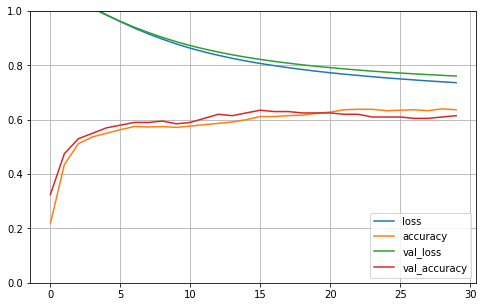

In [73]:
import pandas as pd
import os

CHAPTER_ID = "ann"
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [74]:


model.evaluate(X_test, Y_test)




7/7 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.6716


[0.7659160494804382, 0.6716417670249939]

In [ ]:
X_test


In [57]:
from google.colab import files
Y_test_pred =model.predict_classes(X_test)
Y_test_pred
output = np.column_stack((X_test,Y_test,Y_test_pred))
output_data = pd.DataFrame(output)#pd.merge(pd.DataFrame(X_test), pd.DataFrame(Y_test).merge(pd.DataFrame(Y_test_pred)))
#output_data.head
output_data.to_csv(r'output_neural_network.csv',index=False, header=True)
files.download('output_neural_network.csv')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.con

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model( input_shape=X_train.shape[1:],n_hidden=3, n_neurons=100, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(300,activation="relu",input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add( keras.layers.Dense(3, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#

keras_reg.fit(X_train, Y_train, epochs=30,
              validation_data=(X_valid, Y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
19/19 [==============================] - 1s 13ms/step - loss: 1.1027 - accuracy: 0.3765 - val_loss: 1.0991 - val_accuracy: 0.3450
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.3477 - val_loss: 1.0926 - val_accuracy: 0.3600
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0922 - accuracy: 0.3512 - val_loss: 1.0863 - val_accuracy: 0.3800
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0816 - accuracy: 0.4056 - val_loss: 1.0803 - val_accuracy: 0.3850
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.4356 - val_loss: 1.0746 - val_accuracy: 0.4600
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0705 - accuracy: 0.5153 - val_loss: 1.0690 - val_accuracy: 0.5050
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 1.0659 - accuracy: 0.5421 - val_loss: 1.0636 - val_accuracy: 0.5450
Epoch 8/30
19/19 [=

In [90]:
keras_reg.score(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.9137 - accuracy: 0.5771


-0.9136760830879211